# Imports

In [1]:
import warnings

import numpy   as np
import pandas  as pd
import seaborn as sns

import matplotlib.pyplot as plt

from scipy import stats

from sklearn.model_selection import train_test_split

## Functions

In [2]:
random_state = 42
np.random.seed(random_state)

In [3]:
def calc_cramerv(x, y):
    
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))

In [4]:
def jupyter_settings():

    # plt.rcParams['figure.figsize'] = [25, 12]
    # plt.rcParams['font.size'] = 16
    
    pd.options.display.max_columns = None
    pd.options.display.max_rows = 500
    pd.set_option('display.expand_frame_repr', False)
    
jupyter_settings()

# Loading Dataset

In [5]:
df = pd.read_parquet('../data/interim/from_1.0_book_of_variables.parquet')

In [6]:
df.head()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,customer_lat,customer_lng,seller_geolocation_city_count,seller_geolocation_city_nunique,seller_geolocation_city_size,seller_geolocation_city_mode,seller_geolocation_state_count,seller_geolocation_state_nunique,seller_geolocation_state_size,seller_geolocation_state_mode,distance_customer_seller_count,distance_customer_seller_min,distance_customer_seller_max,distance_customer_seller_mean,distance_customer_seller_median,distance_customer_seller_q25,distance_customer_seller_q75,distance_customer_seller_range,payment_sequential_count,payment_sequential_min,payment_sequential_max,payment_sequential_mean,payment_sequential_median,payment_sequential_q25,payment_sequential_q75,payment_sequential_range,payment_type_count,payment_type_nunique,payment_type_size,payment_type_mode,payment_installments_count,payment_installments_min,payment_installments_max,payment_installments_mean,payment_installments_median,payment_installments_q25,payment_installments_q75,payment_installments_range,payment_value_count,payment_value_min,payment_value_max,payment_value_mean,payment_value_median,payment_value_q25,payment_value_q75,payment_value_range,product_id_count,seller_id_count,price_count,price_min,price_max,price_mean,price_median,price_q25,price_q75,price_range,freight_value_count,freight_value_min,freight_value_max,freight_value_mean,freight_value_median,freight_value_q25,freight_value_q75,freight_value_range,product_category_name_count,product_category_name_nunique,product_category_name_size,product_category_name_mode,product_name_lenght_count,product_name_lenght_min,product_name_lenght_max,product_name_lenght_mean,product_name_lenght_median,product_name_lenght_q25,product_name_lenght_q75,product_name_lenght_range,product_description_lenght_count,product_description_lenght_min,product_description_lenght_max,product_description_lenght_mean,product_description_lenght_median,product_description_lenght_q25,product_description_lenght_q75,product_description_lenght_range,product_photos_qty_count,product_photos_qty_min,product_photos_qty_max,product_photos_qty_mean,product_photos_qty_median,product_photos_qty_q25,product_photos_qty_q75,product_photos_qty_range,product_weight_g_count,product_weight_g_min,product_weight_g_max,product_weight_g_mean,product_weight_g_median,product_weight_g_q25,product_weight_g_q75,product_weight_g_range,product_length_cm_count,product_length_cm_min,product_length_cm_max,product_length_cm_mean,product_length_cm_median,product_length_cm_q25,product_length_cm_q75,product_length_cm_range,product_height_cm_count,product_height_cm_min,product_height_cm_max,product_height_cm_mean,product_height_cm_median,product_height_cm_q25,product_height_cm_q75,product_height_cm_range,product_width_cm_count,product_width_cm_min,product_width_cm_max,product_width_cm_mean,product_width_cm_median,product_width_cm_q25,product_width_cm_q75,product_width_cm_range,order_purchase_until_approved_in_seconds,order_purchase_until_approved_in_minutes,order_purchase_until_approved_in_hours,order_purchase_until_approved_in_days,order_purchase_timestamp_second,order_purchase_timestamp_minute,order_purchase_timestamp_hour,order_purchase_timestamp_day,order_purchase_timestamp_month,order_approved_at_second,order_approved_at_minute,order_approved_at_hour,order_approved_at_day,order_approved_at_month,delivered_in_days,estimated_delivery_in_days
0,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,-23.574809,-46.587471,1,1,1,maua,1,1,1,SP,1,18.051106,18.051106,18.051106,18.051106,18.051106,18.051106,0.0,3.0,1.0,3.0,2.0,2.0,1.5,2.5,2.0,3.0,2.0,3.0,voucher,3.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,2.00,18.59,12.903333,18.12,10.06,18.355,16.59,1.0,1.0,1.0,29.99,29.99,29.99,29.99,29.99,29.99,0.0,1.0,8.72,8.72,8.72,8.72,8.72,8.72,0.0,1.0,1.0,1.0,utilidades_domesticas,1.0,40.0,40.0,40.0,40.0,40.0,40.0,0.0,1.0,268.0,268.0,2

## Columns

In [7]:
df.columns.tolist()

['order_purchase_timestamp',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'customer_lat',
 'customer_lng',
 'seller_geolocation_city_count',
 'seller_geolocation_city_nunique',
 'seller_geolocation_city_size',
 'seller_geolocation_city_mode',
 'seller_geolocation_state_count',
 'seller_geolocation_state_nunique',
 'seller_geolocation_state_size',
 'seller_geolocation_state_mode',
 'distance_customer_seller_count',
 'distance_customer_seller_min',
 'distance_customer_seller_max',
 'distance_customer_seller_mean',
 'distance_customer_seller_median',
 'distance_customer_seller_q25',
 'distance_customer_seller_q75',
 'distance_customer_seller_range',
 'payment_sequential_count',
 'payment_sequential_min',
 'payment_sequential_max',
 'payment_sequential_mean',
 'payment_sequential_median',
 'payment_sequential_q25',
 'payment_sequential_q75',
 'payment_sequential_range',
 'payment_type_count',
 'paymen

## Data Dimensions

In [8]:
print("Number of Rows: {}".format(df.shape[0]))
print("NUmber of Cols: {}".format(df.shape[1]))

Number of Rows: 96478
NUmber of Cols: 146


## Data Types

In [9]:
df.dtypes

order_purchase_timestamp                    datetime64[ns]
order_delivered_customer_date               datetime64[ns]
order_estimated_delivery_date               datetime64[ns]
customer_zip_code_prefix                            object
customer_city                                       object
customer_state                                      object
customer_lat                                       float64
customer_lng                                       float64
seller_geolocation_city_count                        int64
seller_geolocation_city_nunique                      int64
seller_geolocation_city_size                         int64
seller_geolocation_city_mode                        object
seller_geolocation_state_count                       int64
seller_geolocation_state_nunique                     int64
seller_geolocation_state_size                        int64
seller_geolocation_state_mode                       object
distance_customer_seller_count                       int

## Change Data Types

In [10]:
list_columns_to_change = [
    'order_purchase_timestamp_minute', 'order_purchase_timestamp_hour',
    'order_purchase_timestamp_day', 'order_purchase_timestamp_month']

df[list_columns_to_change] = df[list_columns_to_change].astype(np.int64)

In [11]:
df[list_columns_to_change].dtypes

order_purchase_timestamp_minute    int64
order_purchase_timestamp_hour      int64
order_purchase_timestamp_day       int64
order_purchase_timestamp_month     int64
dtype: object

## Check NA

In [12]:
df.isna().mean() * 100

order_purchase_timestamp                    0.000000
order_delivered_customer_date               0.008292
order_estimated_delivery_date               0.000000
customer_zip_code_prefix                    0.000000
customer_city                               0.000000
customer_state                              0.000000
customer_lat                                0.273638
customer_lng                                0.273638
seller_geolocation_city_count               0.000000
seller_geolocation_city_nunique             0.000000
seller_geolocation_city_size                0.000000
seller_geolocation_city_mode                0.224922
seller_geolocation_state_count              0.000000
seller_geolocation_state_nunique            0.000000
seller_geolocation_state_size               0.000000
seller_geolocation_state_mode               0.224922
distance_customer_seller_count              0.000000
distance_customer_seller_min                0.493377
distance_customer_seller_max                0.

# Exploratory Data Analysis

## Univariate Data Analysis

### Porcentage of cities and states

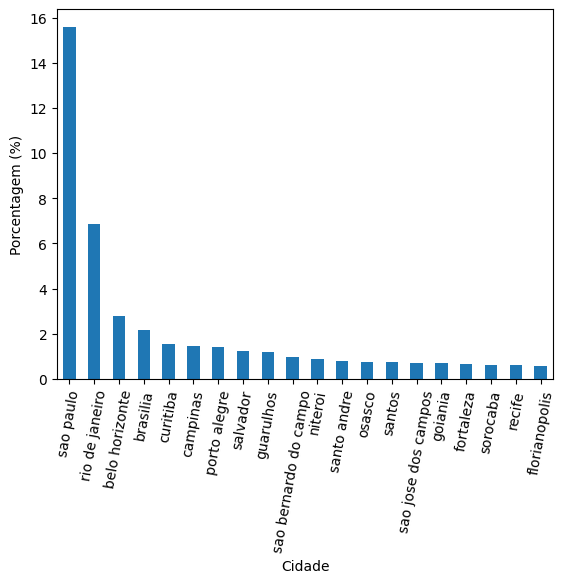

In [13]:
(
    df['customer_city']
    .value_counts(dropna=False, normalize=True)
    .multiply(100)
    .head(20)
    .plot(kind='bar', ylabel='Porcentagem (%)', xlabel='Cidade', rot=80)
);

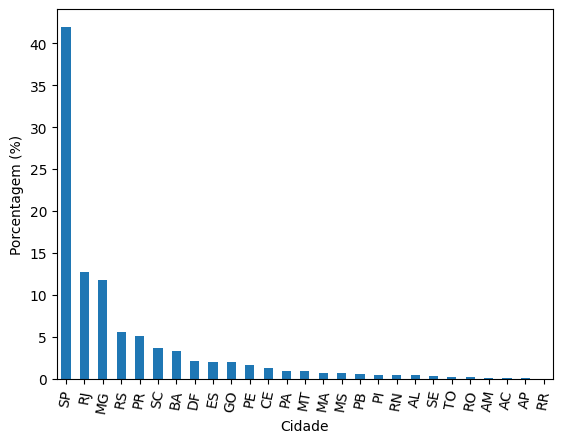

In [14]:
(
    df['customer_state']
    .value_counts(dropna=False, normalize=True)
    .multiply(100)
    .plot(kind='bar', ylabel='Porcentagem (%)', xlabel='Cidade', rot=80)
);

### Distance between customer and seller

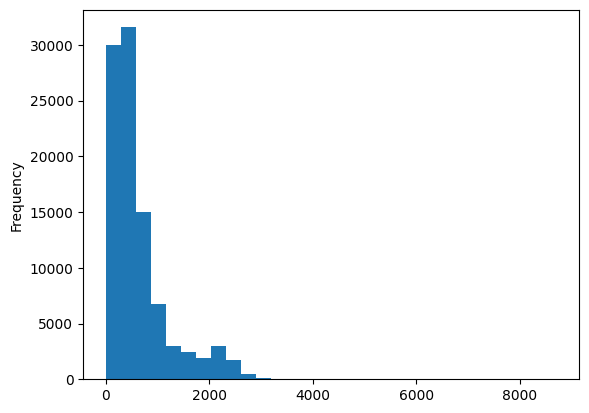

In [15]:
df['distance_customer_seller_mean'].plot(kind='hist', bins=30);

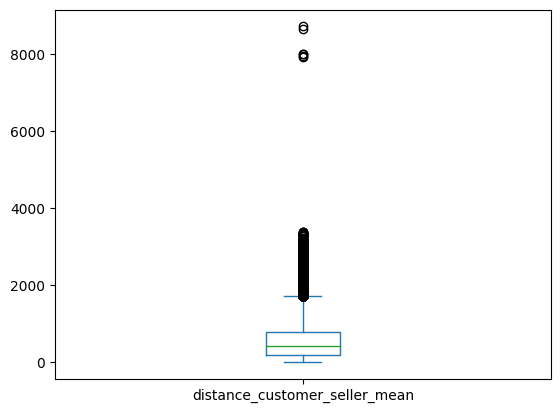

In [16]:
df['distance_customer_seller_mean'].plot(kind='box');

### Most frequent payment type

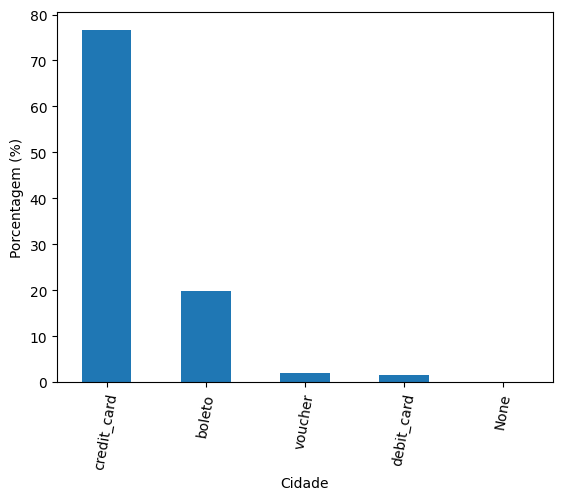

In [17]:
(
    df['payment_type_mode']
    .value_counts(dropna=False, normalize=True)
    .multiply(100)
    .plot(kind='bar', ylabel='Porcentagem (%)', xlabel='Cidade', rot=80)
);

### Price mean

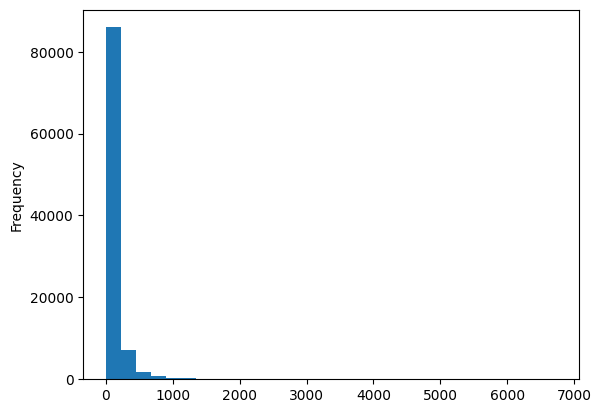

In [18]:
df['price_mean'].plot(kind='hist', bins=30);

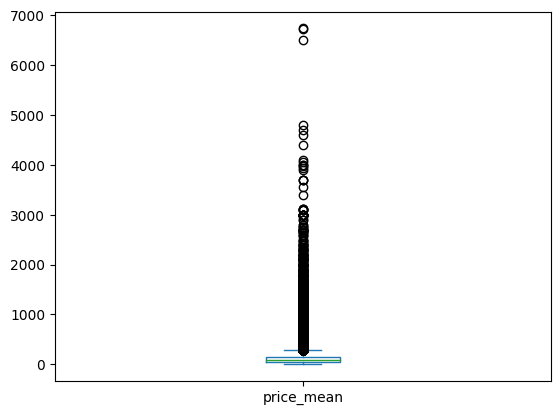

In [19]:
df['price_mean'].plot(kind='box');

### Freight value mean

<Axes: ylabel='Frequency'>

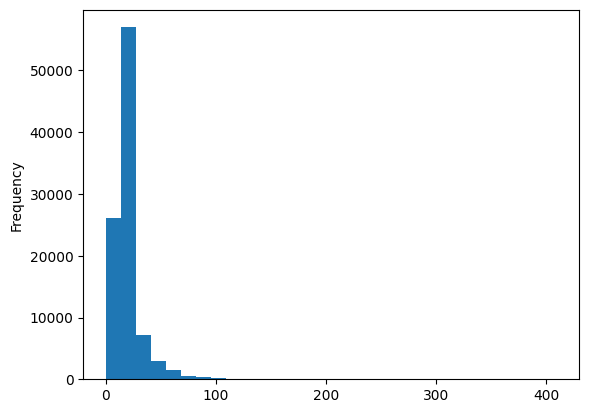

In [20]:
df['freight_value_mean'].plot(kind='hist', bins=30)

<Axes: >

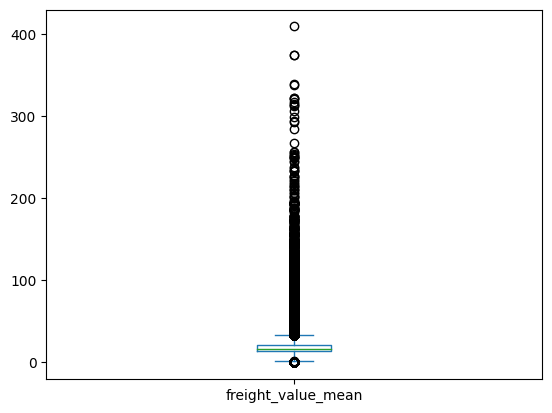

In [21]:
df['freight_value_mean'].plot(kind='box')

## Bivariate Data Analysis

### Correlation between customer-seller distance and freight

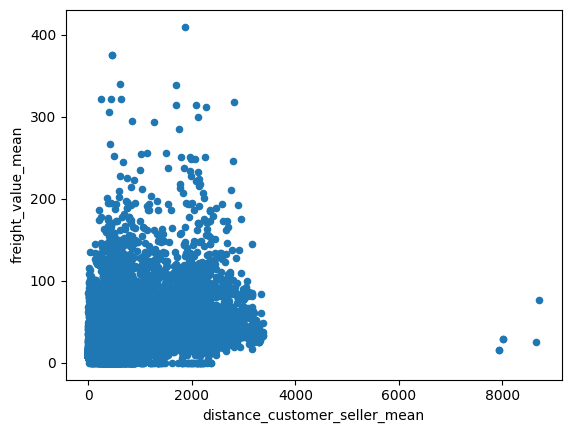

In [22]:
df[['distance_customer_seller_mean', 'freight_value_mean']].plot(
    kind='scatter', x='distance_customer_seller_mean', y='freight_value_mean');

In [23]:
df[['distance_customer_seller_mean', 'freight_value_mean']].corr()

,distance_customer_seller_mean,freight_value_mean
distance_customer_seller_mean,1.00000,0.39781
freight_value_mean,0.39781,1.00000


### Correlation between customer-seller distance and delivered in days

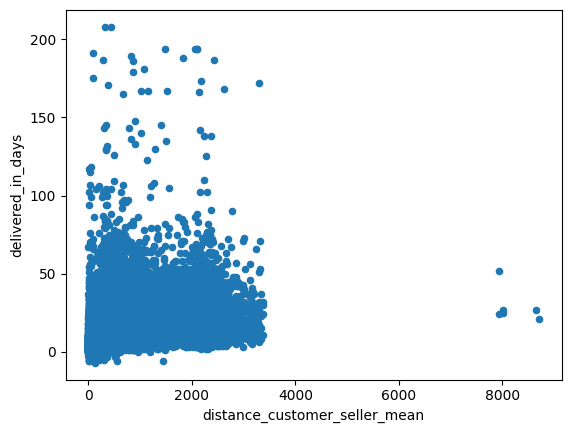

In [24]:
df[['distance_customer_seller_mean', 'delivered_in_days']].plot(
    kind='scatter', x='distance_customer_seller_mean', y='delivered_in_days');

In [25]:
df[['distance_customer_seller_mean', 'delivered_in_days']].corr()

,distance_customer_seller_mean,delivered_in_days
distance_customer_seller_mean,1.000000,0.391761
delivered_in_days,0.391761,1.000000


### State with the highest average freight

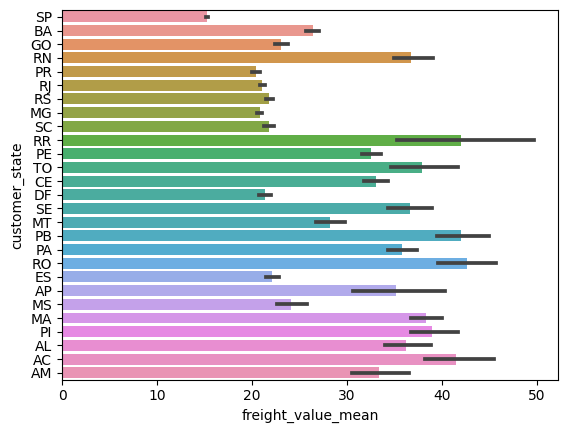

In [26]:
sns.barplot(x='freight_value_mean', y='customer_state', data=df);

### Corralation between product weight and freight

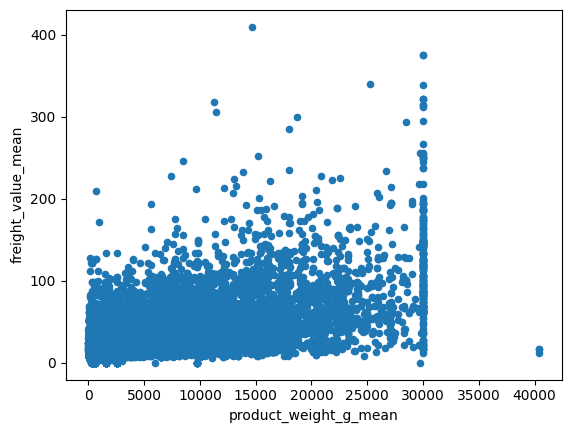

In [27]:
df[['product_weight_g_mean', 'freight_value_mean']].plot(
    kind='scatter', x='product_weight_g_mean', y='freight_value_mean');

In [28]:
df[['product_weight_g_mean', 'freight_value_mean']].corr()

,product_weight_g_mean,freight_value_mean
product_weight_g_mean,1.000000,0.618768
freight_value_mean,0.618768,1.000000


### Correlation between order purchase until approved and delivered in days

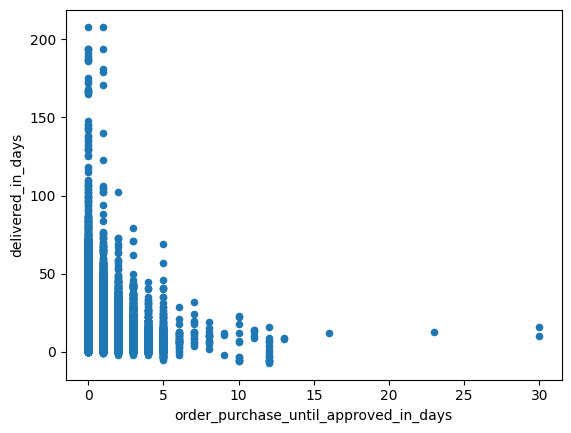

In [29]:
df.plot(kind='scatter', x='order_purchase_until_approved_in_days', y='delivered_in_days');

In [30]:
df[['order_purchase_until_approved_in_days', 'delivered_in_days']].corr()

,order_purchase_until_approved_in_days,delivered_in_days
order_purchase_until_approved_in_days,1.000000,-0.012915
delivered_in_days,-0.012915,1.000000


### Correlation between freight Values and delivered in days

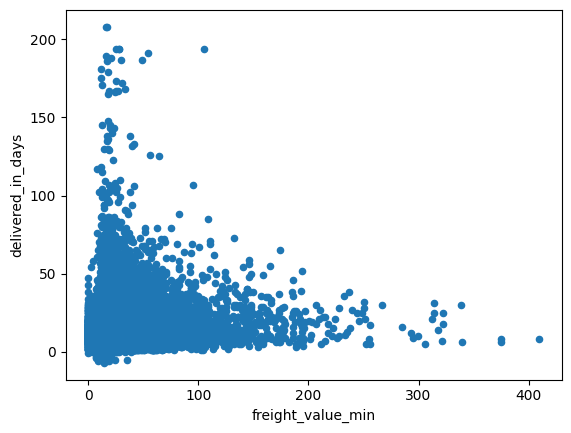

In [31]:
df.plot(kind='scatter', x='freight_value_min', y='delivered_in_days');

In [32]:
df[['freight_value_min', 'delivered_in_days']].corr()

,freight_value_min,delivered_in_days
freight_value_min,1.000000,0.214825
delivered_in_days,0.214825,1.000000


### Correlation between weight and delivered in days

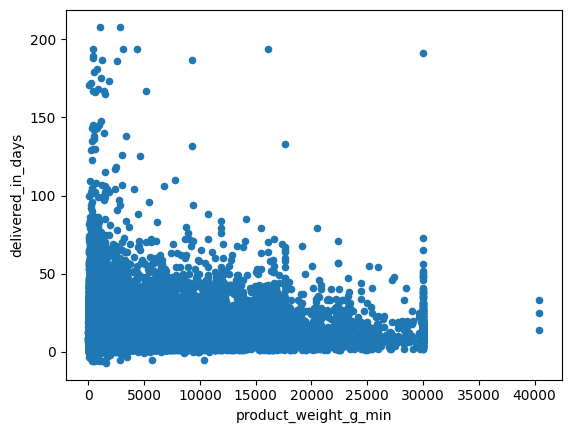

In [33]:
df.plot(kind='scatter', x='product_weight_g_min', y='delivered_in_days');

In [34]:
df[['product_weight_g_min', 'delivered_in_days']].corr()

,product_weight_g_min,delivered_in_days
product_weight_g_min,1.000000,0.081898
delivered_in_days,0.081898,1.000000


### Correlation between lat-lng and delivered in days

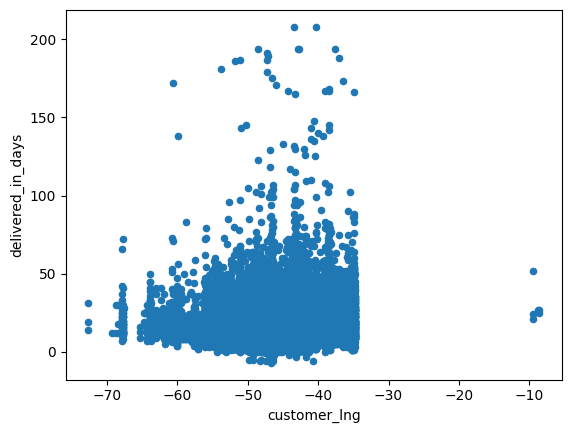

In [35]:
df.plot(kind='scatter', x='customer_lng', y='delivered_in_days');

In [36]:
df[['customer_lng', 'delivered_in_days']].corr()

,customer_lng,delivered_in_days
customer_lng,1.000000,0.114127
delivered_in_days,0.114127,1.000000


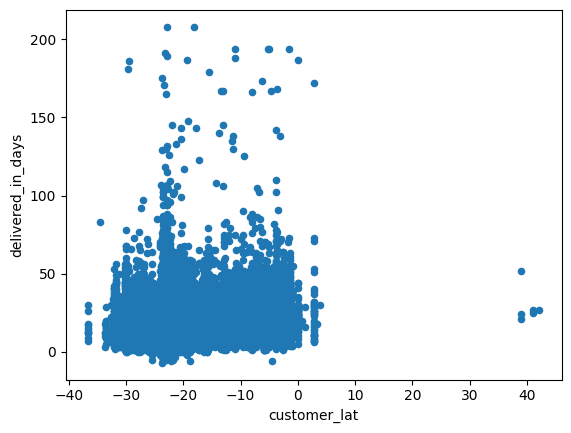

In [37]:
df.plot(kind='scatter', x='customer_lat', y='delivered_in_days');

In [38]:
df[['customer_lat', 'delivered_in_days']].corr()

,customer_lat,delivered_in_days
customer_lat,1.000000,0.257086
delivered_in_days,0.257086,1.000000


## Multivariate Analysis

### Numerical variables

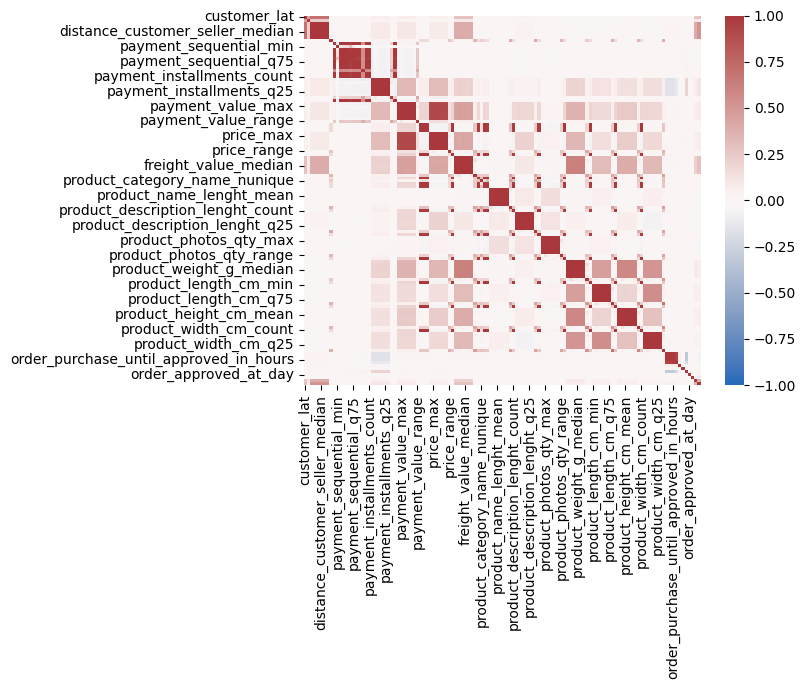

In [39]:
corr = df.select_dtypes(include='float').corr()
sns.heatmap(corr, vmax=1, vmin=-1, center=0, cmap="vlag");

### Categorical variables

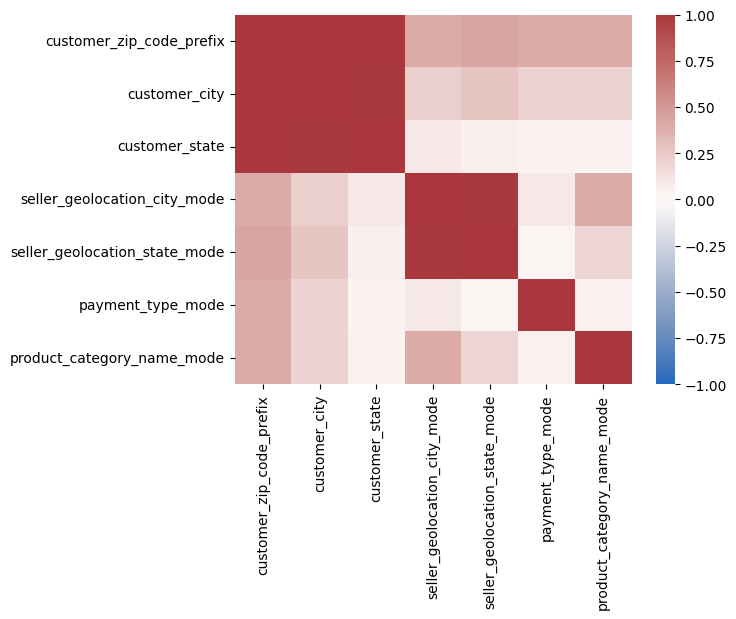

In [40]:
df_aux = df.select_dtypes(include='object')

dict_corr = {}
columns = df_aux.columns.tolist()

for column in columns:
    dict_corr[column] = {}
    
    for column2 in columns:
        dict_corr[column][column2] = calc_cramerv(df[column], df[column2])
        
corr = pd.DataFrame(dict_corr)

sns.heatmap(corr, vmax=1, vmin=-1, center=0, cmap="vlag");

# Spliting into Train, Valid and OoT

In [41]:
df = df.loc[df['delivered_in_days'].notna(), :]

In [42]:
df['order_purchase_timestamp'].dt.strftime('%Y-%m').sort_values().value_counts()
df['time'] = pd.to_datetime(df['order_purchase_timestamp'].dt.strftime('%Y-%m') + '-01')

/tmp/ipykernel_5260/3244858485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['order_purchase_timestamp'].dt.strftime('%Y-%m') + '-01')


In [43]:
df.time.sort_values(ascending=True).value_counts()

time
2017-11-01    7288
2018-01-01    7069
2018-03-01    7003
2018-04-01    6798
2018-05-01    6749
2018-02-01    6555
2018-08-01    6351
2018-07-01    6156
2018-06-01    6096
2017-12-01    5513
2017-10-01    4478
2017-08-01    4193
2017-09-01    4150
2017-07-01    3872
2017-05-01    3545
2017-06-01    3135
2017-03-01    2546
2017-04-01    2303
2017-02-01    1641
2017-01-01     748
2016-10-01     265
2016-12-01       1
2016-09-01       1
Name: count, dtype: int64

In [44]:
df_train = df.loc[df['time'] < '2018-06-01', :]

In [45]:
df_oot = df.loc[df['time'] >= '2018-06-01', :]

In [46]:
df_train.shape

(77853, 147)

In [47]:
df_oot.shape

(18603, 147)

In [48]:
df_train.to_parquet('../data/processed/df_train_from_2.2_exploratory_data_analysis.parquet')
df_oot.to_parquet('../data/processed/df_oot_from_2.2_exploratory_data_analysis.parquet')